In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrlogin02.jureca


In [2]:
import os

import re
import pandas as pd
import numpy as np

import pli
import pli.image as im

from tqdm import tqdm

In [4]:
pca_path = "data/aa/pca_80/resnet50_planes8_962-1083_sphere_small/Vervet1818aa_60mu_70ms_s0898_x00-20_y00-13_PCA.h5"

###

import h5py as h5

with h5.File(pca_path, 'r') as f:
    mask = f['Valid'][:]
    pca_values = f['PCA'][:]
    eigenvalues = f['PCA'].attrs['eigenvalues']
    total_variance_explained = f['PCA'].attrs['variance_explained']
    n_components = f['PCA'].attrs['n_components']
    spacing = f['PCA'].attrs['spacing']

In [5]:
out_files = "data/aa/pca_80/resnet50_planes8_sphere_small/overlay/PCA{0:02d}_s0898.h5"

cmap='twilight_shifted'

mask_color = (255, 255, 255, 0)

###

from pli.data import Section

import matplotlib.pyplot as plt

for i in range(n_components):
    current_data = pca_values[i].copy()

    q_min = np.percentile(current_data, 0.2)
    q_max = np.percentile(current_data, 99.8)
    current_data = np.clip(current_data, q_min, q_max)

    vmin = min(current_data.min(), -current_data.max())
    vmax = -vmin    

    current_mask = mask.copy()

    colormap = plt.get_cmap(cmap)
    normalized_image = (current_data - vmin) / (vmax - vmin)
    rgb_image = (colormap(normalized_image)  * 255).astype(np.uint8)

    rgb_image[~mask] = mask_color
    rgb_image = np.roll(rgb_image, (-1, -1), axis=(0, 1))
    rgb_image = rgb_image.swapaxes(0, 1)[:, ::-1]

    section = Section(image=rgb_image)
    section.spacing = spacing
    section.origin = (0, 0)
    section.modality = 'PCA'
    section.to_hdf5(out_files.format(i + 1), num_levels=6, compression='lzf', overwrite=True)

/p/home/jusers/oberstrass1/jureca/project/miniconda3/envs/pli/lib/python3.9/site-packages/atlaslib/image.py:497: UserWarning: level 0 is already located in pyramid path. Not linking again.
  warnings.warn("level 0 is already located in pyramid path. Not linking again.")


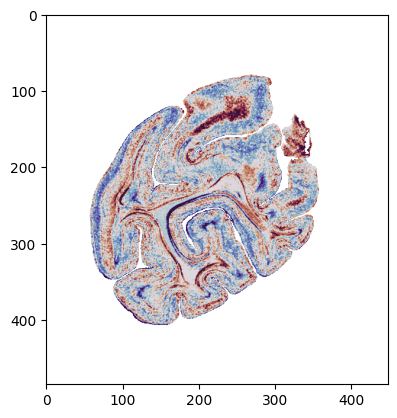

In [17]:
plt.imshow(rgb_image)